This is a guided project from DataQuest. It explores a dataset of job outcomes of students who graduated college between 2010 and 2012. The cleaned dataset was acquired from FiveThirtyEight's Github repo. 

Each row is a different college major and containts various information about it across the columns. The main columns are:
* `Rank` - rank by median earnings
* `Major_code` - numeric major code
* `Major` - description of major
* `Major_category` - category of major
* `total` - total number of people with major
* `Sample_size` - sample size (unweighted) of full time
* `Men` - male graduates
* `Women` - female graduates
* `ShareWomen` - women as share of total graduates
* `Employed` - number employed
* `Median` - median salary of full time year-round workers
* `Low_wage_jobs` - number in low-wage service jobs
* `Full_time` - number employed 35 hours or more
* `Part_time` - number employed less than 35 hours

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads = pd.read_csv('recent-grads.csv')
print(recent_grads.iloc[0])
recent_grads.head()

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [2]:
print(recent_grads.describe())

             Rank   Major_code          Total            Men          Women  \
count  173.000000   173.000000     172.000000     172.000000     172.000000   
mean    87.000000  3879.815029   39370.081395   16723.406977   22646.674419   
std     50.084928  1687.753140   63483.491009   28122.433474   41057.330740   
min      1.000000  1100.000000     124.000000     119.000000       0.000000   
25%     44.000000  2403.000000    4549.750000    2177.500000    1778.250000   
50%     87.000000  3608.000000   15104.000000    5434.000000    8386.500000   
75%    130.000000  5503.000000   38909.750000   14631.000000   22553.750000   
max    173.000000  6403.000000  393735.000000  173809.000000  307087.000000   

       ShareWomen  Sample_size       Employed      Full_time      Part_time  \
count  172.000000   173.000000     173.000000     173.000000     173.000000   
mean     0.522223   356.080925   31192.763006   26029.306358    8832.398844   
std      0.231205   618.361022   50675.002241   428

For ease with plotting we will drop rows with missing values.

In [3]:
raw_data_count = recent_grads.shape[0]
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape[0]
counts = 'Our dataset had {} rows and after dropping rows with NA values now has {} rows.'.format(raw_data_count, cleaned_data_count)
print(counts)

Our dataset had 173 rows and after dropping rows with NA values now has 172 rows.


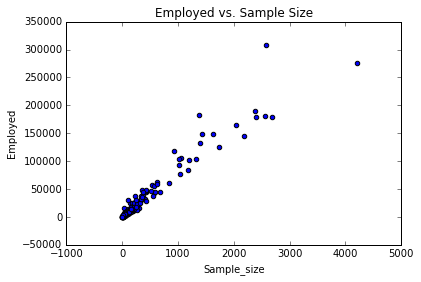

In [4]:
ax = recent_grads.plot(x='Sample_size', y='Employed', kind='scatter')
ax.set_title('Employed vs. Sample Size')

We're going to start by exploring a few relationships in the data to get a sense of the dataset as a whole.

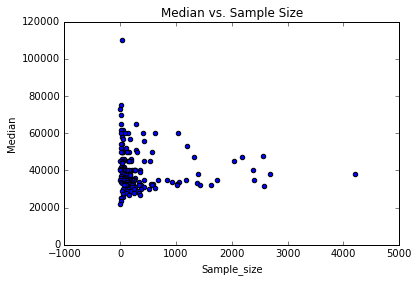

In [5]:
ax = recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
ax.set_title('Median vs. Sample Size')

It looks like the sample size for many majors is very low.

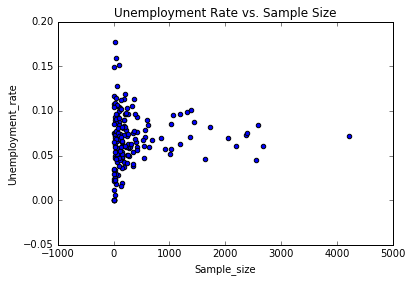

In [6]:
ax = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
ax.set_title('Unemployment Rate vs. Sample Size')

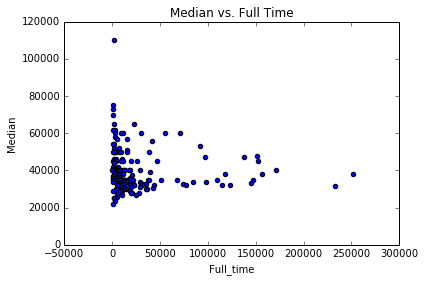

In [7]:
ax = recent_grads.plot(x='Full_time', y='Median', kind='scatter')
ax.set_title('Median vs. Full Time')

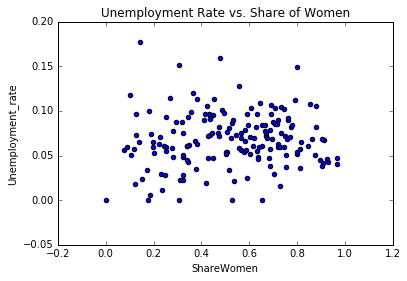

In [8]:
ax = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')
ax.set_title('Unemployment Rate vs. Share of Women')

There does not seem to be any relationship between the share of women graduates and the unemployment rate.

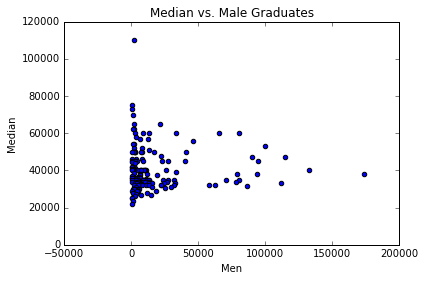

In [9]:
ax = recent_grads.plot(x='Men', y='Median', kind='scatter')
ax.set_title('Median vs. Male Graduates')

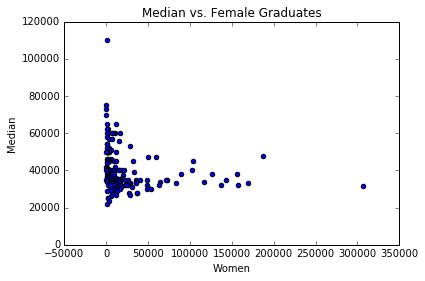

In [10]:
ax = recent_grads.plot(x='Women', y='Median', kind='scatter')
ax.set_title('Median vs. Female Graduates')

First question to dive into is: do students in more popular majors make more money? To answer this, we'll need to plot the number of gradutes for that major (`Total`) with the median earnings for that major (`Median`). If more popular majors make more money, we would expect a positive relationship between rank and median.

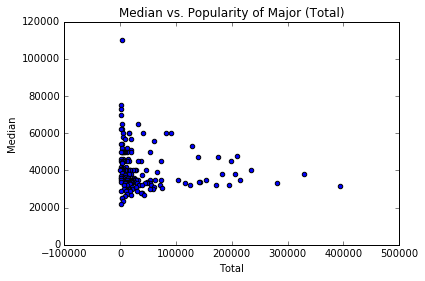

In [11]:
ax = recent_grads.plot(x='Total', y='Median', kind='scatter')
ax.set_title('Median vs. Popularity of Major (Total)')

This first attempt looks very skewed, based on what we discovered earlier there is not an even distribution of popularity of various majors. Perhaps an easier way to do this is to break everything into bins and plot as a histogram instead.

In [12]:
recent_grads['Total'].max()

393735.0

First we'll need to make a frequency table to group majors together. To figure out what the best bins would be, let's look at some basic statistics of the number of graduates across majors.

In [13]:
recent_grads['Total'].describe()

count       172.000000
mean      39370.081395
std       63483.491009
min         124.000000
25%        4549.750000
50%       15104.000000
75%       38909.750000
max      393735.000000
Name: Total, dtype: float64

The majority of the data are between 100 and 40K gradutes, and after that the number of graduates per major jumps up quite a bit. To try and balance granularity but not too many bins, we can try: 100-2500  gradutes, 2500-5000, 5000-15000, 15000-35000, and 35000+.

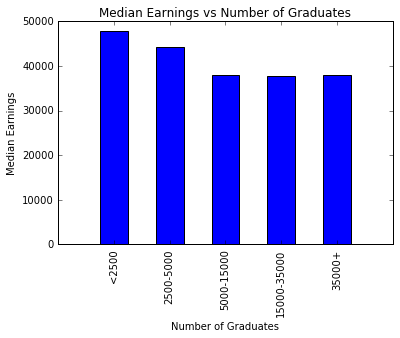

In [14]:
total_ft = {}
bin1 = round(recent_grads.loc[recent_grads['Total'] < 2500, 'Median'].mean(), 0)
bin2 = round(recent_grads.loc[recent_grads['Total'].between(2500,5000), 'Median'].mean(), 0)
bin3 = round(recent_grads.loc[recent_grads['Total'].between(5000,15000), 'Median'].mean(), 0)
bin4 = round(recent_grads.loc[recent_grads['Total'].between(15000,35000), 'Median'].mean(), 0)
bin5 = round(recent_grads.loc[recent_grads['Total'] > 35000, 'Median'].mean(), 0)

bar_height = [bin1, bin2, bin3, bin4, bin5]

fig, ax = plt.subplots()
leftpos = np.arange(5)+0.75
ax.bar(leftpos, bar_height,0.5)
ax.set_xticks(leftpos+0.25)
ax.set_xticklabels(['<2500', '2500-5000', '5000-15000', '15000-35000', '35000+'], rotation=90)
ax.set_title('Median Earnings vs Number of Graduates')
ax.set_xlabel('Number of Graduates')
ax.set_ylabel('Median Earnings')

From this we can get a better handle on what the scatter plot hinted at: graduates from the *least* popular majors actually make more money.

Next we want to explore if students that majors taht were majority female make more money? To do this we'll start again by getting a sense of the distribution of proportion female graudates across majors.

In [15]:
recent_grads['ShareWomen'].describe()

count    172.000000
mean       0.522223
std        0.231205
min        0.000000
25%        0.336026
50%        0.534024
75%        0.703299
max        0.968954
Name: ShareWomen, dtype: float64

It looks like these majors range from completely male (0% female) to heavily female dominant (96% female).

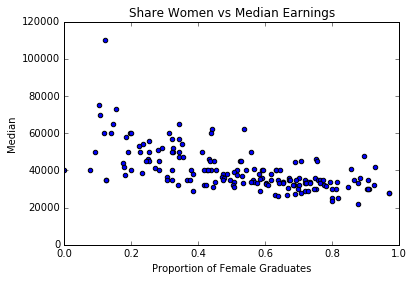

In [16]:
ax = recent_grads.plot(x='ShareWomen', y='Median', kind='scatter')
ax.set_xlim(0,1)
ax.set_xlabel('Proportion of Female Graduates')
ax.set_title('Share Women vs Median Earnings')

There is a slight trend towards students in more female dominant majors making less money, but the relationship is not super strong.

Next, let's look at the relationship between full-time employees and median salary. In this case, we specifically want to look at the number of full time employees compared to the total number of graduates-- 100/100 graduates employed full time is more meaningful than 200/20000 graduates employed full time.

So first we'll calculate the share of full time employees compared to total graduates, then we'll use that to compare to median salary.

In [17]:
sharefulltime = recent_grads['Full_time'] / recent_grads['Total']
sharefulltime.describe()

count    172.000000
mean       0.666427
std        0.102083
min        0.372872
25%        0.597190
50%        0.673859
75%        0.734996
max        0.958949
dtype: float64

Everything looks fairly evenly distributed so it'll be easier to use a scatterplot again for this.

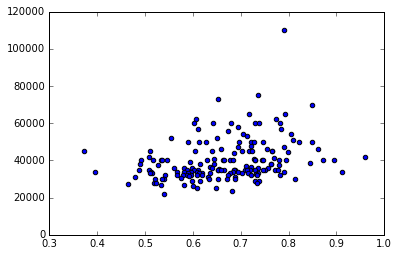

In [18]:
ax = plt.scatter(sharefulltime, recent_grads['Median'])

It looks like there is a weak positive correlation between full-time employees and median salary.

Now we'll look at the distributions of some specific columns.

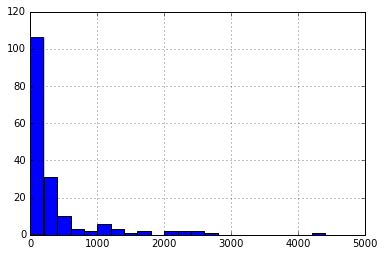

In [19]:
recent_grads['Sample_size'].hist(bins=25, range=(0,5000))

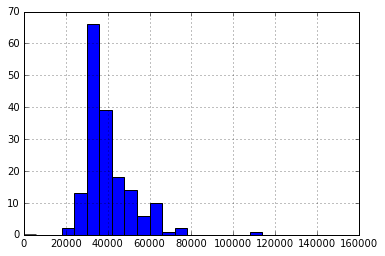

In [20]:
recent_grads['Median'].hist(bins=25, range=(0,150000))

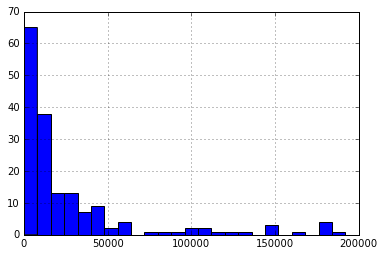

In [21]:
recent_grads['Employed'].hist(bins=25, range=(0,200000))

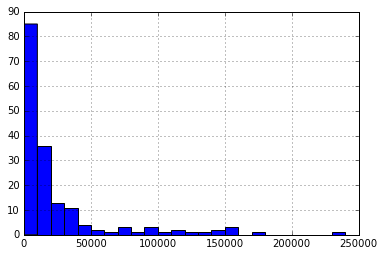

In [22]:
recent_grads['Full_time'].hist(bins=25, range=(0,250000))

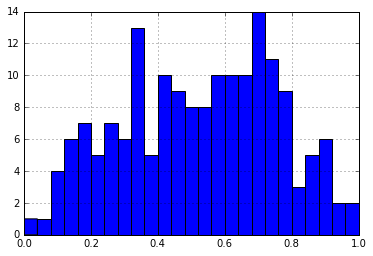

In [23]:
recent_grads['ShareWomen'].hist(bins=25, range=(0,1))

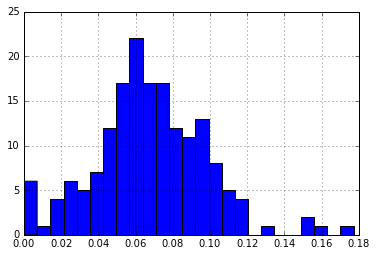

In [24]:
recent_grads['Unemployment_rate'].hist(bins=25)

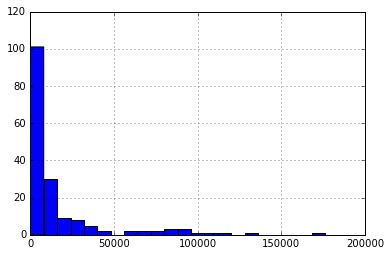

In [25]:
recent_grads['Men'].hist(bins=25, range=(0,200000))

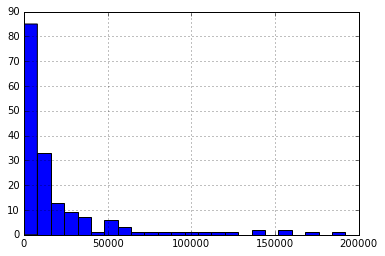

In [26]:
recent_grads['Women'].hist(bins=25, range=(0,200000))

First question we want to ask of these plots is what percent of majors are predominantly male. Upon visual inspection, it looks like about half (maybe a little less) of majors are predominantly male. We can easily put a number to this.

In [27]:
predommale = recent_grads[recent_grads['ShareWomen'] < 0.5].shape[0]
perc_predommale = round((predommale/recent_grads.shape[0])*100,1)
print('{}% of majors are predominantly male.'.format(perc_predommale))

44.2% of majors are predominantly male.


Our guess based on visual inspection was pretty spon on: just under half of all majors (44%) are predominantly male, meaning about 56% are predominantly female. Here we define "predominantly" as a simple majority of graduates.

Next we'll look at the most common median salary range. From the histogram we can see that the peak is just under $40,000. We can also use `Series.value_counts()` to inspect this. 

In [28]:
recent_grads['Median'].value_counts().sort_index()

22000      1
23400      1
25000      2
26000      1
27000      2
27500      1
28000      3
29000      4
30000      8
30500      1
31000      3
31500      1
32000      8
32100      1
32200      1
32400      1
32500      1
33000      9
33400      1
33500      2
34000      8
35000     20
35600      1
36000      6
36200      1
36400      1
37000      1
37400      1
37500      1
38000      5
38400      1
39000      1
40000     17
40100      1
41000      2
41300      1
42000      2
44000      1
44700      1
45000      9
46000      3
47000      2
48000      1
50000      9
51000      1
52000      2
53000      1
54000      2
56000      1
57000      1
57100      1
58000      1
60000      6
62000      2
65000      2
70000      1
73000      1
75000      1
110000     1
Name: Median, dtype: int64

This confirms our initial guess, with the most common median salary being between 33K and 36K.

Now we'll explore a bit with a scatter matrix.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffae5b6e358>,
      dtype=object)

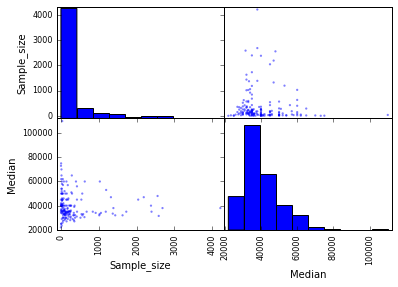

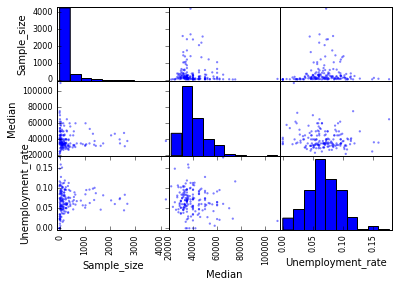

In [29]:
import pandas.plotting as pdplt

pdplt.scatter_matrix(recent_grads[['Sample_size', 'Median']])
pdplt.scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']])

Now we'll revisit a couple questions from earlier using the scatter matrix. The first one we can try is number of graduates vs. median salary.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffae57dd358>,
      dtype=object)

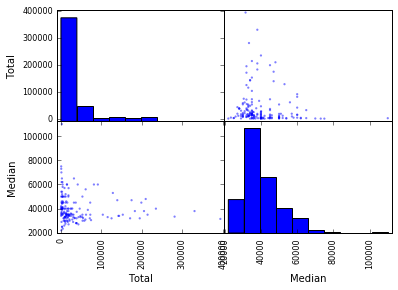

In [30]:
pdplt.scatter_matrix(recent_grads[['Total', 'Median']])


Above we get a more succinct view of what we looked at earlier: the most lucrative majors do not have too many gradutes.

Now we'll look at the percentages of women in the majors in the first ten rows and the last ten rows (most and least lucrative majors, respectively).

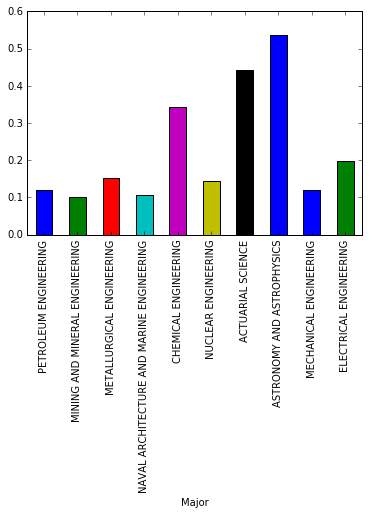

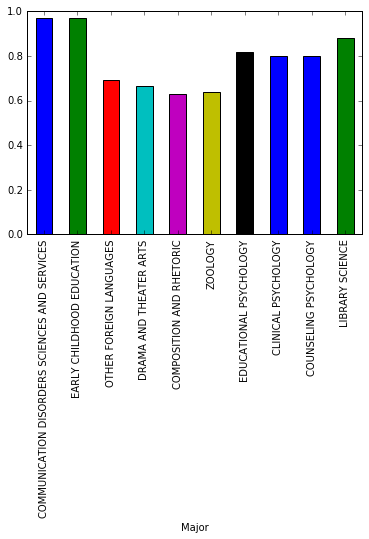

In [35]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
recent_grads[-10:].plot.bar(x='Major', y='ShareWomen', legend=False)
            

This shows in a different light the relationship between more earnings and whether the field is male dominated. 

Next we'll do the same to look at the unemployment rate.

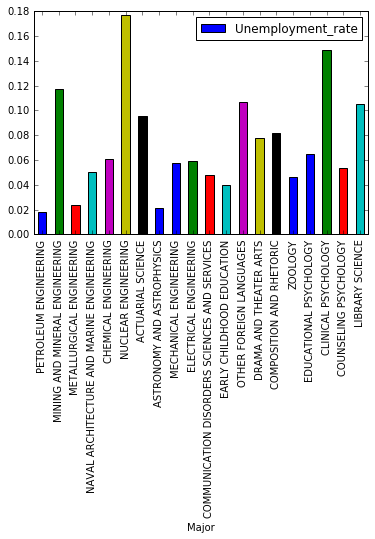

In [32]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', legend=False)
recent_grads[-10:].plot.bar(x='Major', y='ShareWomen', legend=False)
            

It looks like the unemployment rate is not drastically different between the higher earning majors and the lower earning majors.

Lastly, we'll play with a new plot type for fun. We're going to use a hexagonal bin plot to look at a few columns with dense scatter plots.

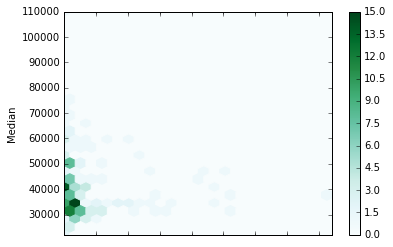

In [33]:
ax = recent_grads.plot.hexbin(x='Sample_size', y='Median', gridsize=25)

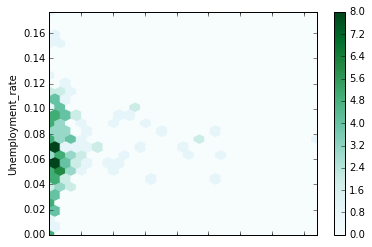

In [34]:
ax = recent_grads.plot.hexbin(x='Sample_size', y='Unemployment_rate', gridsize=25)
ax.set_xlabel('Sample Size')

This is a lot more useful for cases like above where so many data points on top of each other made it difficult to see general patterns across the d